## Uber Pickup Analysis in New York City.

#### Problem Statement

Efficient trip and driver management are essential for improving service quality and operational performance in the ride-hailing industry.
Uber wants to ensure that it accurately understands city-wide demand trends and optimizes resource allocation to meet rider needs across New York City.

###Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

####Load Data set

In [ ]:
April = pd.read_csv("April_Uber.csv")
May = pd.read_csv("May_Uber.csv")
June = pd.read_csv("June_Uber.csv")

####Merging Dataset

In [ ]:
uber = pd.concat([April,May,June])

In [ ]:
#read first 5 rows
uber.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [ ]:
#Read last 5 rows
uber.tail()

,Date/Time,Lat,Lon,Base
663839,6/30/2014 22:40:00,40.7332,-73.9872,B02764
663840,6/30/2014 23:12:00,40.7905,-73.9796,B02764
663841,6/30/2014 23:13:00,40.7640,-73.9887,B02764
663842,6/30/2014 23:15:00,40.7262,-73.9944,B02764
663843,6/30/2014 23:35:00,40.7404,-73.9848,B02764


#### Data Preparation & Cleaning Process

In [ ]:
#shape of data set
uber.shape

(1880795, 4)

In [ ]:
#information of Data
uber.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880795 entries, 0 to 663843
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 71.7+ MB


In [ ]:
#conver Date/time in Datetime format
uber["Date/Time"] = pd.to_datetime(uber["Date/Time"])

In [ ]:
#check Data types
uber.dtypes

,0
Date/Time,datetime64[ns]
Lat,float64
Lon,float64
Base,object


In [ ]:
#check missing values
uber.isnull().sum()

,0
Date/Time,0
Lat,0
Lon,0
Base,0


In [ ]:
#check duplicate
uber.duplicated().sum()

np.int64(28510)

In [ ]:
#drop duplicate
uber= uber.drop_duplicates()
uber.duplicated().sum()

np.int64(0)

In [ ]:
#Add Feature column
uber["Month"] = uber["Date/Time"].dt.month_name().str[:3]
uber["Weekly"] = uber["Date/Time"].dt.day_name()
uber["Days"] = uber["Date/Time"].dt.day
uber["Hour"] = uber["Date/Time"].dt.hour

In [ ]:
#Rename Columns Lat & Lon
uber.rename(columns = {"Lon": "Longitude",
"Lat": "Latitude"}, inplace=True)

### Exploraty Data Analysis & Visualization

In [ ]:
#descriptive analysis
uber.describe().T

,count,mean,min,25%,50%,75%,max,std
Date/Time,1852285,2014-05-18 07:25:32.333728,2014-04-01 00:00:00,2014-04-26 20:47:00,2014-05-18 00:32:00,2014-06-10 05:56:00,2014-06-30 23:59:00,NaN
Lat,1852285.0,40.739957,39.9558,40.7222,40.7433,40.7612,42.1166,0.037356
Lon,1852285.0,-73.975213,-74.929,-73.9971,-73.984,-73.9685,-72.0666,0.053926
Days,1852285.0,15.776992,1.0,8.0,16.0,23.0,31.0,8.802489
Hour,1852285.0,14.356114,0.0,10.0,16.0,19.0,23.0,5.871671


In [ ]:
#set theme
sns.set_theme(style="darkgrid")

* #### Which Base have most used for ride?

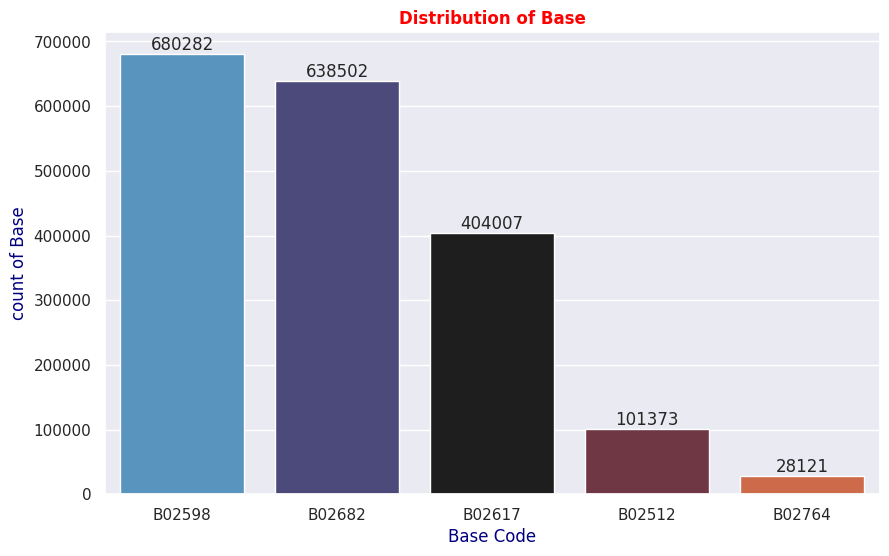

In [ ]:
base= uber["Base"].value_counts().reset_index()
plt.figure(figsize=(10,6))
ax = sns.barplot(x = "Base",y= "count",
data = base, palette="icefire")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Distribution of Base",size =12, color="red",
fontweight="bold")
plt.xlabel("Base Code", color="navy", size=12)
plt.ylabel("count of Base", color="navy", size =12)
plt.show()

I analysed distribution of Base where I found 02598 have most used for ride and B02764 have less used for ride.

* #### How many people have used ride for trips in every month?

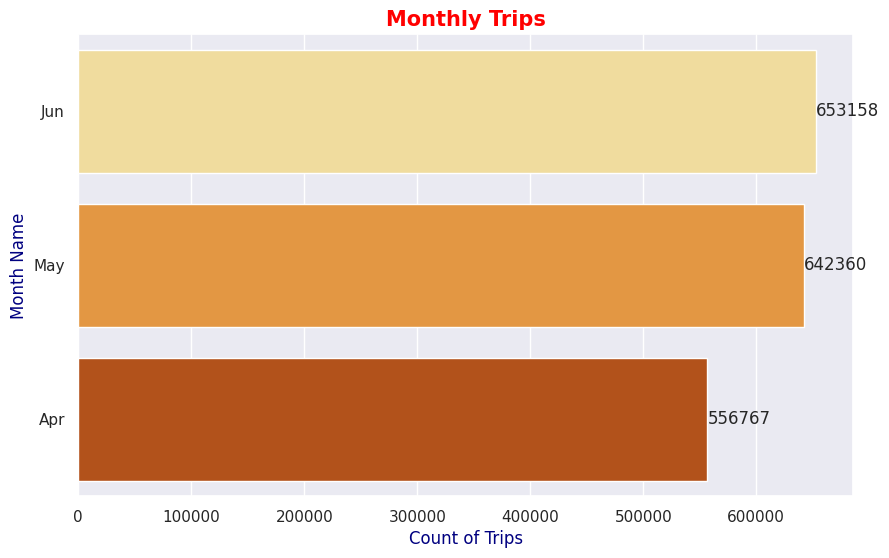

In [ ]:
month= uber["Month"].value_counts().reset_index()
plt.figure(figsize=(10,6))
ax = sns.barplot(x = "count", y = "Month",
data = month, palette= "YlOrBr")
for bars in ax.containers:
   ax.bar_label(bars)
plt.title("Monthly Trips", size =15,
color="red", fontweight= "bold")
plt.xlabel("Count of Trips",size =12, color="navy")
plt.ylabel("Month Name", size =12, color="navy")
plt.show()

Most Uber rides were taken in the month of June, indicating the highest trip demand during this period.

* #### How many people have used ride for trips in Weekly?

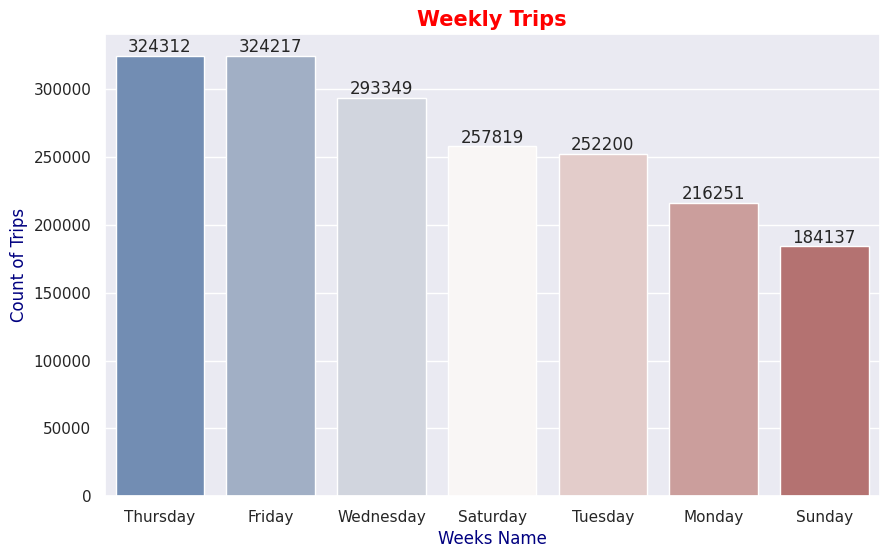

In [ ]:
Weekly= uber["Weekly"].value_counts().reset_index()
plt.figure(figsize=(10,6))
ax = sns.barplot(y= "count", x= "Weekly",
data = Weekly, palette= "vlag")
for bars in ax.containers:
   ax.bar_label(bars)
plt.title("Weekly Trips", size =15,
color="red", fontweight= "bold")
plt.ylabel("Count of Trips",size =12, color="navy")
plt.xlabel("Weeks Name", size =12, color="navy")
plt.show()

Uber shows the highest ride demand on Thursdays and Fridays, indicating that end-of-week travel and commuting patterns significantly increase trip activity.

* #### Daily rides demand

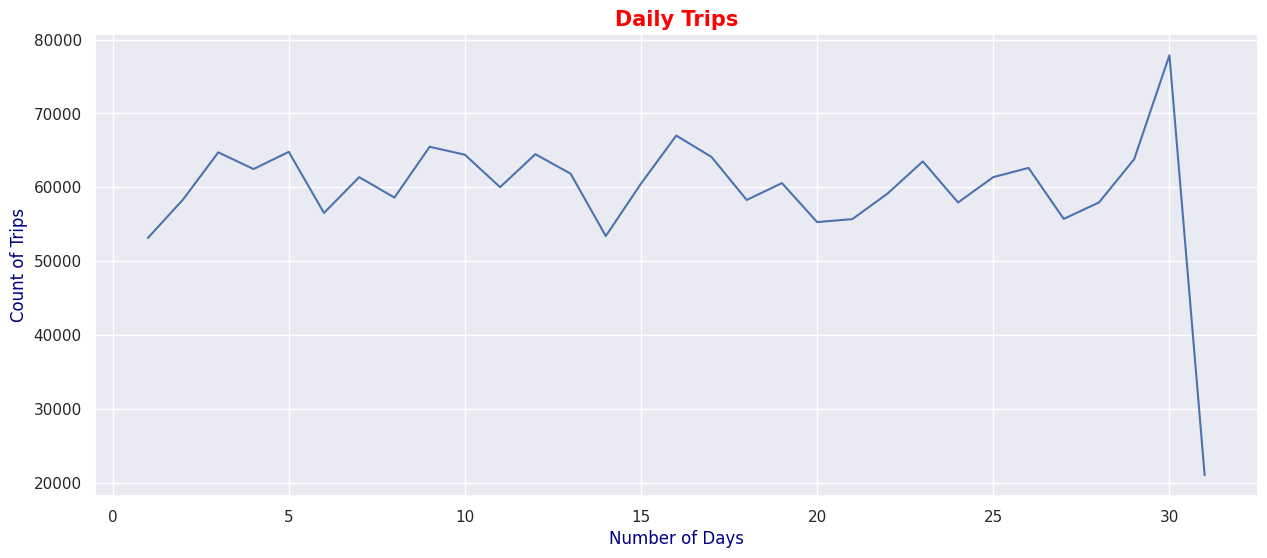

In [ ]:
Daily=uber["Days"].value_counts().reset_index()
Daily = Daily.sort_values(by="count", ascending=False )
plt.figure(figsize=(15,6))
sns.lineplot(y= "count", x= "Days",
data = Daily)
plt.title("Daily Trips", size =15,
color="red", fontweight= "bold")
plt.ylabel("Count of Trips",size =12, color="navy")
plt.xlabel("Number of Days", size =12, color="navy")
plt.show()

The daily ride trend shows that demand peaks on the 30th day of each month, possibly due to end-of-month activities, while there’s a noticeable drop on the 31st day, which could indicate lower demand or missing trip data.

* #### Hourly Rides demand

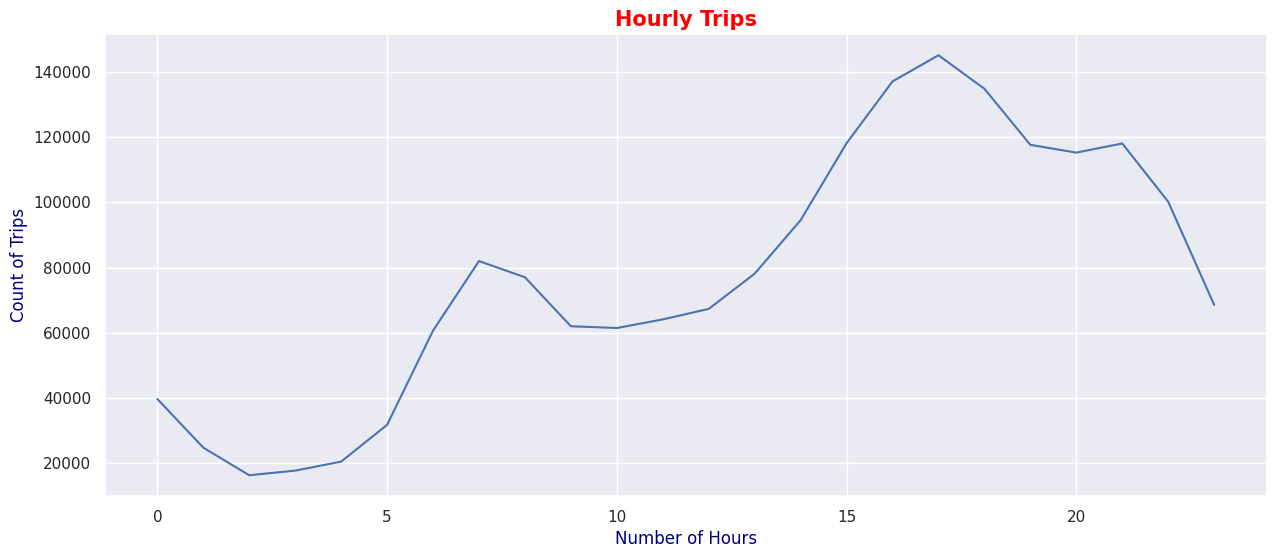

In [ ]:
hourly= uber["Hour"].value_counts().reset_index()
hourly = hourly.sort_values(by="count", ascending=False )
plt.figure(figsize=(15,6))
sns.lineplot(y= "count", x= "Hour",
data = hourly)
plt.title("Hourly Trips", size =15,
color="red", fontweight= "bold")
plt.ylabel("Count of Trips",size =12, color="navy")
plt.xlabel("Number of Hours", size =12, color="navy")
plt.show()

The number of rides starts increasing around 5 AM, peaks between 5 PM and 7 PM, and then gradually decreases after 9 PM, reaching the lowest around 12 AM.

* #### Relationship in Longitude & Latitude

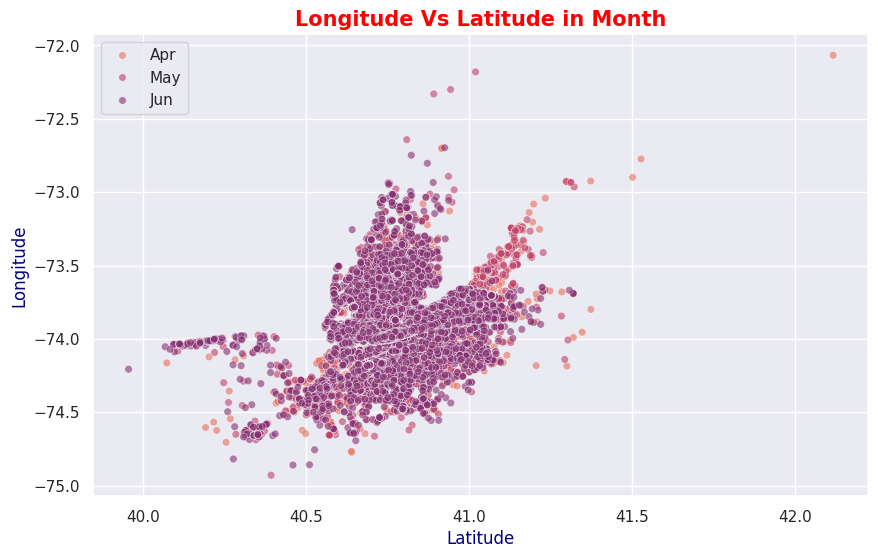

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x ="Latitude", y = "Longitude",data = uber,
hue = "Month", palette= "flare",alpha=0.6, s=30)
plt.title("Longitude Vs Latitude in Month", size =15,
color="red", fontweight="bold")
plt.xlabel("Latitude", size=12, color= "navy")
plt.ylabel("Longitude", size =12, color="navy")
plt.legend()
plt.show()

The scatter plot shows that most rides are concentrated around specific latitude and longitude ranges, indicating high activity in central city regions. The pattern remains consistent across months, though June shows slightly higher clustering compared to April and May.

## Insights


##### 1. Base-wise Demand

* Base B02598 handled the highest number of rides, showing it’s Uber’s busiest dispatch zone.

##### 2. Monthly Trend

* Ride volume increased steadily, with June showing the highest demand.

##### 3. Weekly Trend

* Highest demand occurred on Thursdays and Fridays, reflecting end-of-week commute and leisure activity.

##### 4. Daily Trend

* Rides peaked on the 30th day of each month and dropped on the 31st, possibly because of salary-day activities or missing data.

##### 5. Hourly Trend

* Demand starts rising at 5 AM, peaks between 5 PM – 7 PM, then falls sharply after 9 PM.

##### 6. Geographical Pattern (Latitude–Longitude)

* Pickups are highly concentrated in central city zones, consistent across months.

## Business Recommendation


#### 1. Optimize Driver Scheduling:
Increase driver availability during peak hours (5 PM–7 PM) and high-demand days (Thu–Fri).


#### 2. Month-End Operations:
Plan short-term incentives or marketing campaigns on the 30th of each month to capture higher ride demand.


#### 3. Resource Allocation:
Assign more drivers or vehicles to Base B02598 to balance load and reduce wait times.


#### 4. Dynamic Pricing Strategy:
Use surge pricing intelligently during high-demand periods to maximize revenue without hurting customer satisfaction.


#### 5. Location Targeting:
Focus marketing and promotional activities in central New York City clusters where ride concentration is highest.